In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
N = int(input("Enter the dimension: "))  # Lattice size
T = np.linspace(1.04, 2.97, 100)  # Temperature range
beta = 1.0 / 1.53
config = np.random.choice([-1, 1], size=(N, N))

Enter the dimension: 3


In [4]:
def mcmove(config, beta):
    """Perform one Monte Carlo step using the Metropolis algorithm."""
    for _ in range(N * N):  # Sweep through all spins once
        a, b = np.random.randint(0, N), np.random.randint(0, N)
        s = config[a, b]

        # Summing the neighboring spins (Periodic boundary conditions)
        nb = config[(a+1) % N, b] + config[(a-1) % N, b] + config[a, (b+1) % N] + config[a, (b-1) % N]

        cost = 2 * s * nb  # Energy change if flipped

        # Metropolis acceptance criterion
        if cost < 0 or np.random.rand() < np.exp(-cost * beta):
            config[a, b] *= -1

In [5]:
def Energy(config):
    """Compute the total energy of the current configuration."""
    energy = 0
    for i in range(N):
        for j in range(N):
            S = config[i, j]
            nb = config[(i+1) % N, j] + config[(i-1) % N, j] + config[i, (j+1) % N] + config[i, (j-1) % N]
            energy += -S * nb
    return energy / 2  # Each bond is counted twice


In [13]:
# Equilibrate the system
for _ in range(1000):
    mcmove(config, beta)

# Arrays to store results
E, M, C = np.zeros(len(T)), np.zeros(len(T)), np.zeros(len(T))

# Monte Carlo Simulation over Temperature Range
for t in range(len(T)):
    beta = 1.0 / T[t]
    E1 = E2 = M1 = 0

    for _ in range(5000):
        mcmove(config, beta)
        En = Energy(config)
        Mag = np.sum(config)

        E1 += En
        M1 += Mag
        E2 += En * En

    # Normalize results
    E[t] = E1 / (5000 * N * N)
    M[t] = M1 / (5000 * N * N)
    C[t] = (E2 / (5000 * N * N) - (E1 / (5000 * N * N))**2) * beta**2

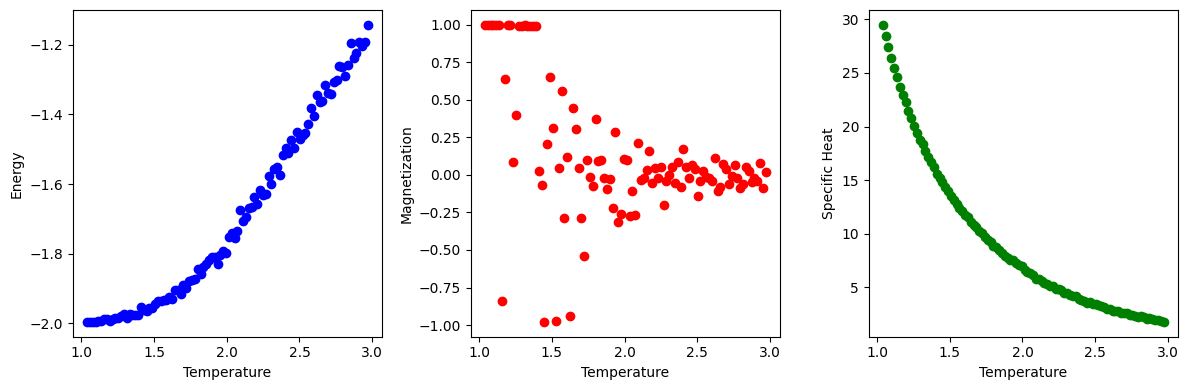

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(T, E, color='blue')
plt.xlabel("Temperature")
plt.ylabel("Energy")

plt.subplot(1, 3, 2)
plt.scatter(T, M, color='red')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")

plt.subplot(1, 3, 3)
plt.scatter(T, C, color='green')
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")

plt.tight_layout()
plt.show()
